# Hipotesis 1 : Los ataques han sido menos fatales, ocasionando menos muertes, en los últimos años. 

In [90]:
import numpy as np
# Your Code Here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Configuro el seaborn para que todos los graficos tengan la misma apariencia. 

In [94]:
sns.set_context("poster")
sns.set(rc={'figure.figsize': (20.,6.)})
sns.set_style('whitegrid')

Quiero saber si los ataques ocurridos han sido menos mortales en los ultimos años. Por lo que limpio el database para tener valores en los ultimos años (desde el 1900 hasta hoy en día) y categorizo en dos posibilidades los ataques, en Yes (muertes), No(Vivos) y UNKNOWN(Los que no se supieron) 

In [96]:
df = pd.read_csv("Output_df/df_Fatality.csv",encoding = "ISO-8859-1")

Text(0.5, 1.0, 'Shark Attackes according to mortality in approx. last century')

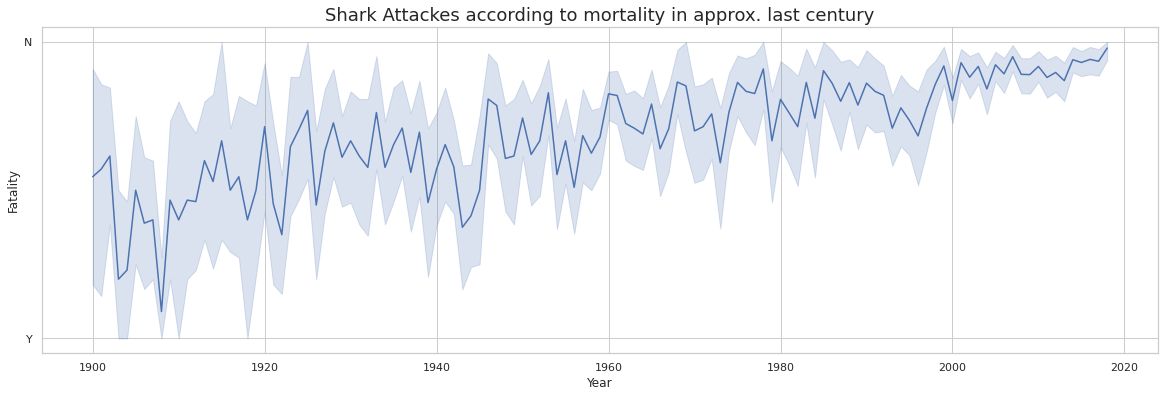

In [109]:
sns.lineplot(data=df, x=df.Year, y=df.Fatality).set_title('Shark Attackes according to mortality in approx. last century', fontsize=18)

En este primer gráfico se puede ver la variacion de muertes que va desde unos datos muy inclinados a una muerte pronosticada de un 50% de las ocasiones hasta los años 1930. Y esta probabilidad bajando cuando nos vamos acercando al siglo XXI.

Con el siguiente gráfico, me gustaria saber si la densidad de ataques a subido a no con los años. Dando a entender que ahora hay más ataques, pero sigue muriendo la misma cantidad de gente. Viendo un aumento de los casos totales, pero no de las muertes. 


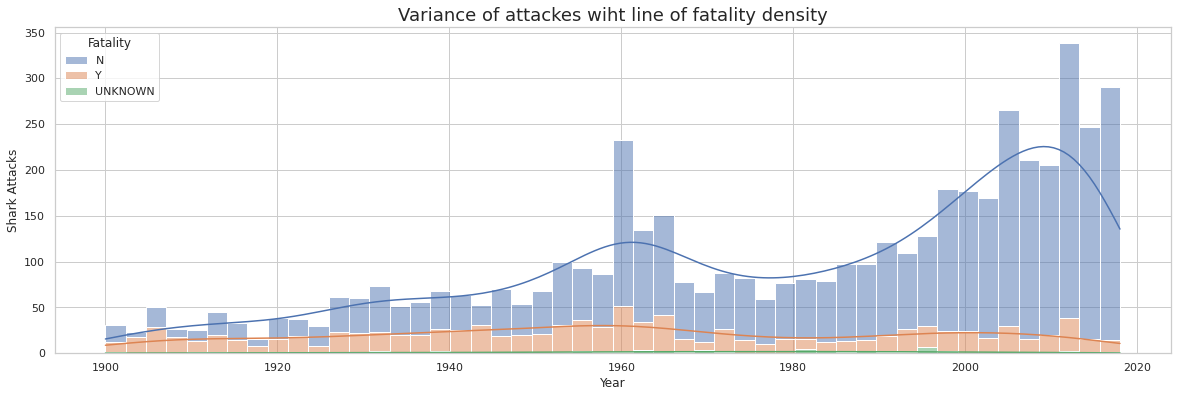

In [171]:
sns.histplot(data=df, x="Year", hue="Fatality",kde=True, bins=50, multiple='stack').set_title('Variance of attackes wiht line of fatality density', fontsize=18)
plt.ylabel("Shark Attacks");

Esto quiere decir, que la hipotesis de que ahora se muere menos gente por ataque de tiburón es correcta. Ya que aún habiendo más casos, el porcentaje de muertes ha disminuido. 

Estos datos nos hace pensar en que quizás el salvamento maritimo y ayudas en la salud ha mejorado este porcentaje de muertes. Ya que hasta los años 1930, era un 50% de muertes. 

Tambien podría ser que los datos antes del año 1950 no hubieran sido correctamente reportados, ya que al principio del siglo XX tendemos a pensar que se reportarían ataques que fueran graves o fatales, pero no leves. 

Esto me hizo pensar ¿Está el genero presente en estas estadisticas, en la primera mitad del siglo XX?
En los siguientes gráficos, me interesaba saber si a principios del siglo pasado se reportaban a mujeres atacadas por tiburones. 

In [118]:
df_gender = pd.read_csv("Output_df/df_Fatal_Gender.csv",encoding = "ISO-8859-1")

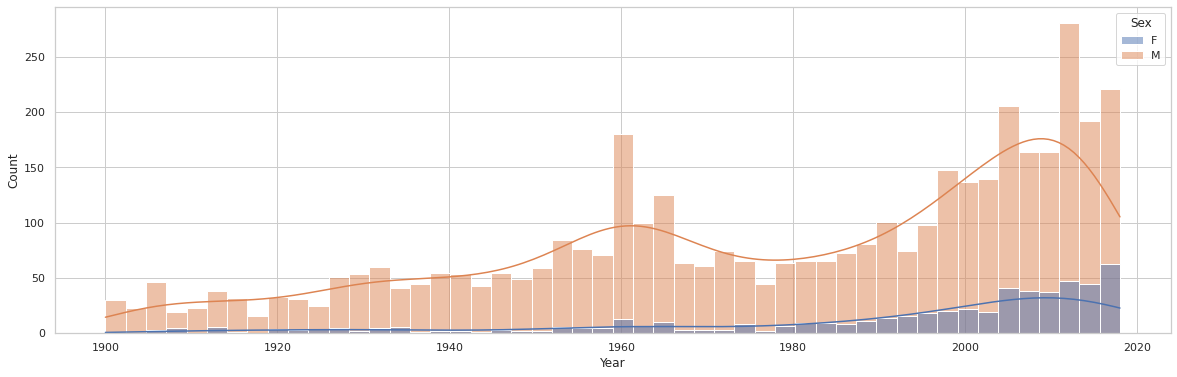

In [173]:
sns.histplot(data=df_gender, x="Year", hue="Sex",kde=True, bins=50);

El gráfico representa la baja representacion de ataques a mujeres. En este sentido, me gustaría valorar si las mujeres no eran atacadas, ya que no tenían acceso a las mismas actividades que los hombres o si era un mero problema en la recopilación de datos. 

In [120]:
df_activity = pd.read_csv("Output_df/df_Dead_Gen_Activity.csv",encoding = "ISO-8859-1")

En el siguiente gráfico se ve como las mujeres han estado presentes en las actividades como bathing y swimming desde principios del siglo XX, en cambio en surfing, snorkeling o diving, la presencia de mujeres en ataques de tiburón, no está presente hasta la decada de los 90. 


Esto hace entender el aumento de ataques en el gráfico anterior sobre esas fechas. 

In [122]:
Box_sex_activity = px.box(df_activity, x='Year', y="Activity", color="Fatality", points="all", width=950, height=600) #Points añade los puntos a la izquierda de cada box
Box_sex_activity.show()

# Hipotesis 2 : Los ataques de tiburón son más recurrentes en los meses de verano.  

Quiero saber si los ataques de tiburones son más usuales en los meses de verano. Para eso me creo una base de datos de los ataques, que tenga tambien una definición por meses. 

In [123]:
df_2 = pd.read_csv("Output_df/df_Hypo2.csv",encoding = "ISO-8859-1")

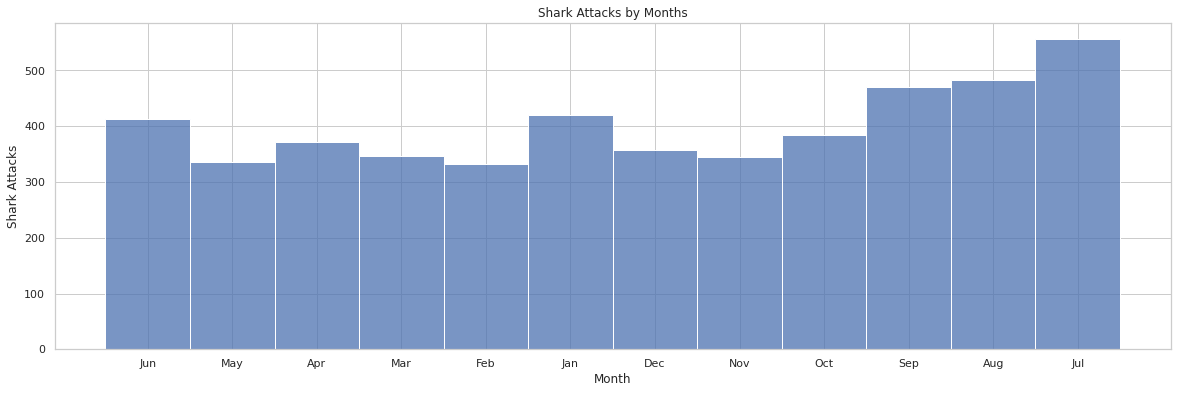

In [129]:
sns.histplot(data=df_2, x="Month");
plt.title("Shark Attacks by Months")
plt.ylabel("Shark Attacks");

En este primer gráfico es díficil ver la correlación, ya que todos los paises están representados. Por lo que me quedo con dos de los países para saber si la gráfica avala la hipotesis. 

Por lo que me quedo con los dos paises con más ataques. 

Text(0.5, 1.0, 'Shark attack by countries')

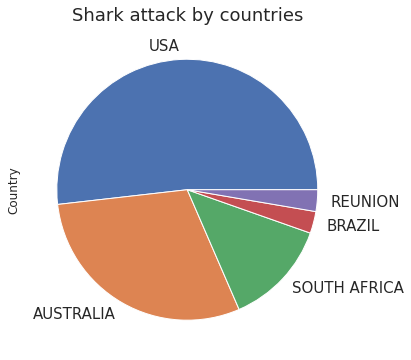

In [133]:
df_2.Country.value_counts().nlargest(5).plot.pie(labels=['USA', 'AUSTRALIA', 'SOUTH AFRICA', 'BRAZIL', 'REUNION'], fontsize=15, figsize=(6, 6))
plt.title("Shark attack by countries", fontsize=18)

Estos paises serán USA y Australia. Por lo que vemos en el siguiente gráfico que los meses varián teniendo en cuenta que se encuentran en hemisferios diferentes, con meses de verano distintos. Lo que nos hace ver, que el verano es el mayor atenuante para estos acontecimientos.

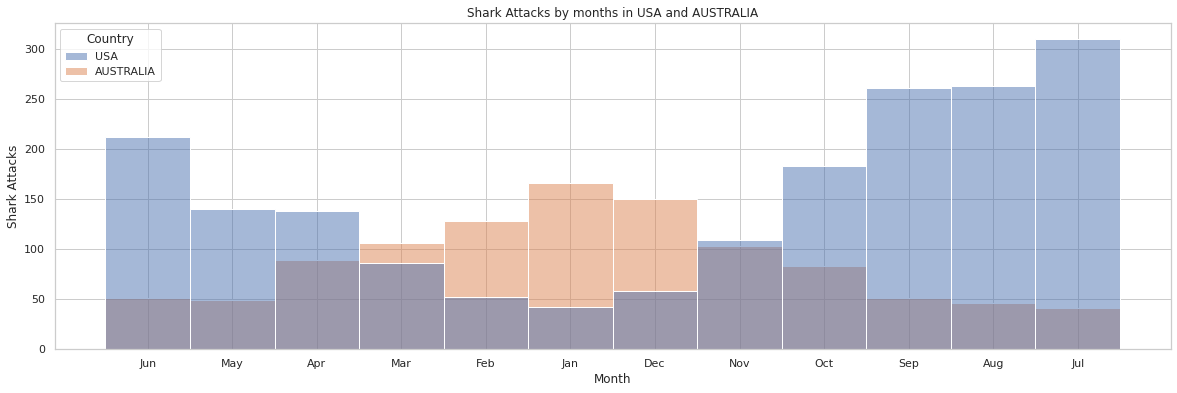

In [170]:
df_AU = df_2[(df_2["Country"] == "USA")|(df_2["Country"] == "AUSTRALIA")]
sns.histplot(data=df_AU, x="Month", hue="Country",bins=50);
plt.title("Shark Attacks by months in USA and AUSTRALIA")
plt.ylabel("Shark Attacks");

Me concentro en solo USA, para analizar en más detalle. 

In [135]:
df_USA = pd.read_csv("Output_df/df_USA.csv",encoding = "ISO-8859-1")

In [136]:
df_USA['Month'] = pd.Categorical(df_USA['Month'],
                                   categories=['Jan', 'Feb', "Mar", "Apr", "May", "Jun", "Jul", "Aug","Sep","Oct","Nov","Dec"],
                                   ordered=True)

Text(0.5, 1.0, 'Shark Attacks in USA')

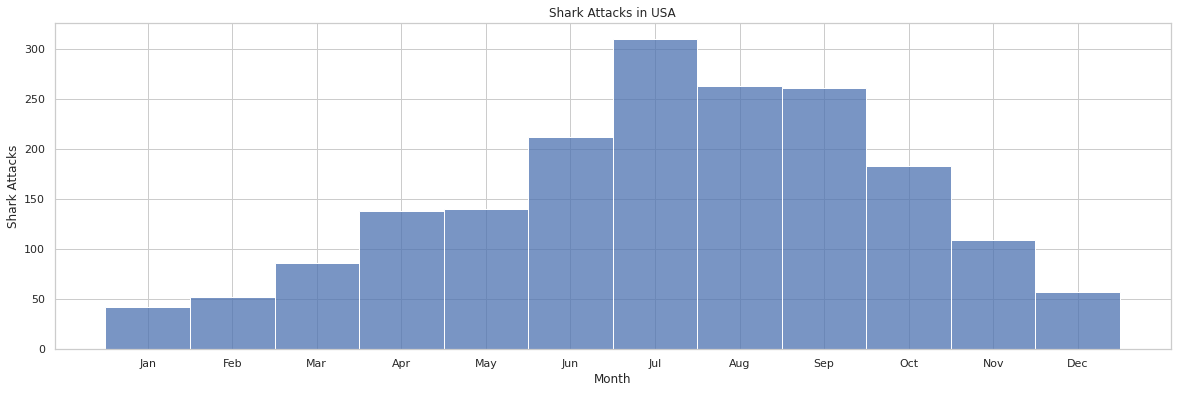

In [137]:
g = sns.histplot(x='Month', data=df_USA)
plt.ylabel("Shark Attacks");
plt.title("Shark Attacks in USA")

Donde vemos que los ataques se producen mayormente en verano, por lo que la hipotesis es correcta. 

Y me pregunto si las actividades que se realizan en el mar, suelen ser en verano y si tiene que ver con los ataques. 
Por lo que miro a ver cuales son las actividades más usuales en el momento del ataque. 

Text(0.5, 1.0, 'Activities in USA in which are more attacks.')

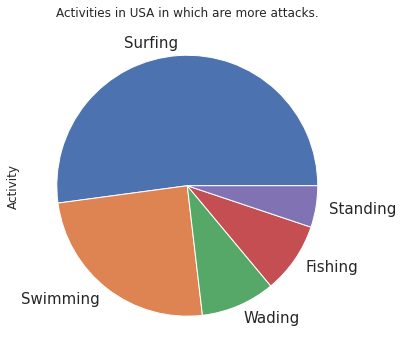

In [147]:
df_USA.Activity.value_counts().nlargest(5).plot.pie(fontsize=15, figsize=(6, 6))
plt.title("Activities in USA in which are more attacks.")

Viendo estas actividades, se genera un filtro con estas para ver su impacto en los meses del año. 

In [159]:
df_USA_act = pd.read_csv("Output_df/df_USA_act.csv",encoding = "ISO-8859-1")

In [160]:
df_USA_act['Month'] = pd.Categorical(df_USA_act['Month'],
                                   categories=['Jan', 'Feb', "Mar", "Apr", "May", "Jun", "Jul", "Aug","Sep","Oct","Nov","Dec"],
                                   ordered=True)

Text(0.5, 1.0, 'Shark Attacks in USA by leisure use')

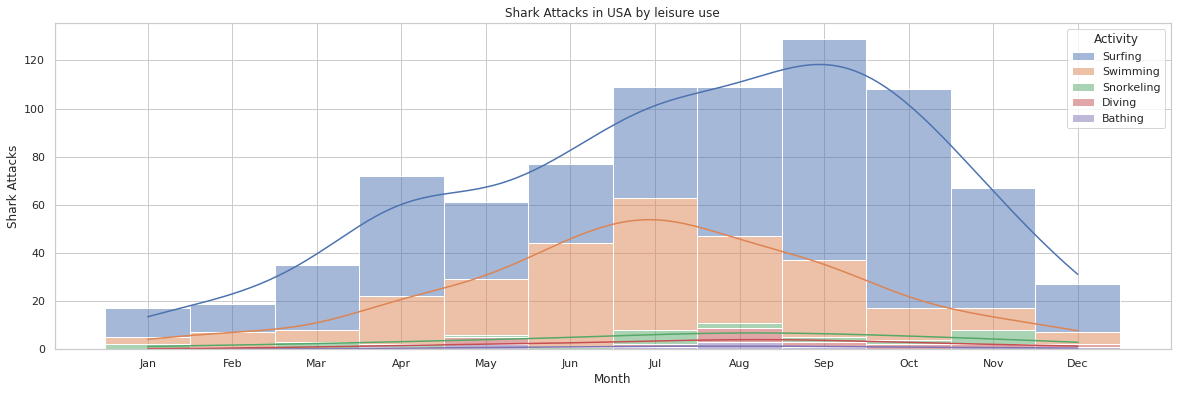

In [168]:
sns.histplot(x='Month', hue="Activity",data=df_USA_act, kde=True, multiple='stack')
plt.ylabel("Shark Attacks");
plt.title("Shark Attacks in USA by leisure use")

Viendo las actividades tienen un impacto, y que vemos que atividades como nadar se dan mayores en verano. 

¿Tendrán el mismo resultado en la zona oeste y este del pais? 

In [87]:
df_USA_coast = pd.read_csv("Output_df/df_USA_coast.csv",encoding = "ISO-8859-1")

In [88]:
df_USA_coast['Month'] = pd.Categorical(df_USA_coast['Month'],
                                   categories=['Jan', 'Feb', "Mar", "Apr", "May", "Jun", "Jul", "Aug","Sep","Oct","Nov","Dec"],
                                   ordered=True)

Text(0.5, 1.0, 'Shark Attacks in USA by leisure use')

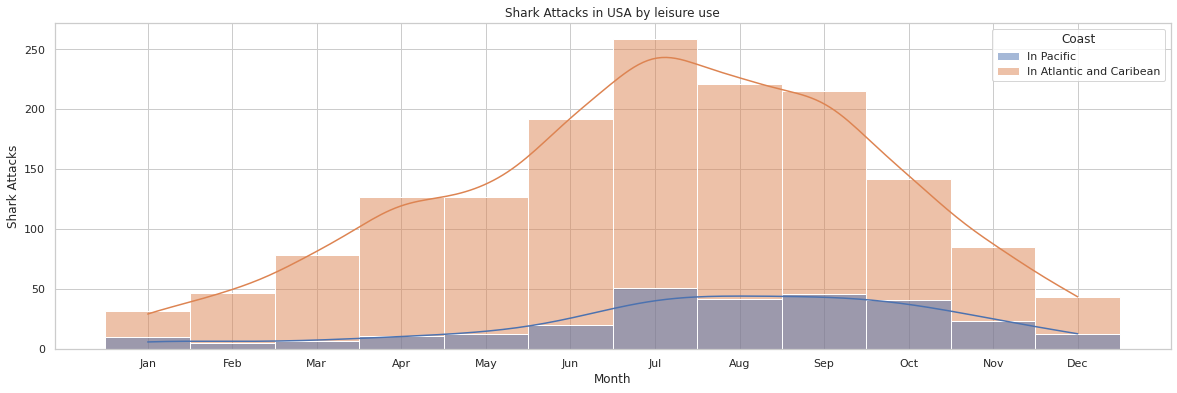

In [174]:
g = sns.histplot(x='Month', hue="Coast",data=df_USA_coast, kde=True)
plt.ylabel("Shark Attacks");
plt.title("Shark Attacks in USA by leisure use")

Parece que en el pacifico los meses en los que se producen los ataques son julio, agosto, septiembre y octubre por igual. Suponiendo que es la temporada de surf. Y en el Atlantico hay un claro repunte en Julio. 